<a href="https://colab.research.google.com/github/oddy04/miguelperez-dataportfolio/blob/main/Predicci%C3%B3n_de_Aceptaci%C3%B3n_de_Cr%C3%A9ditos_Personales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR1s3VGu9NHlM186qspHvWuJ-El1Ci4XPv-uh3Hfky0iFTGv4xIWnL3euCprl0TK2ZLAmWDQsx_r_xu/pub?gid=1820424605&single=true&output=csv'
df = pd.read_csv(url)
display(df.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
print("\---conteo de valores nulos---")
print(df.isnull().sum())

\---conteo de valores nulos---
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipython-input-1079259163.py:1: SyntaxWarning: invalid escape sequence '\-'
  print("\---conteo de valores nulos---")


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_encode = pd.get_dummies(df, columns=['Family', 'Education'], drop_first=True)

In [15]:
binarias = ['Securities Account', 'CD Account','Online','CreditCard']
for col in binarias:
  df_encode[col] = df_encode[col].astype('category').cat.codes

In [16]:
print("---forma del dataset despues de encoding---")
print(df_encode.shape)
print(df_encode.head())

---forma del dataset despues de encoding---
(5000, 17)
   ID  Age  Experience  Income  ZIP Code  CCAvg  Mortgage  Personal Loan  \
0   1   25           1      49     91107    1.6         0              0   
1   2   45          19      34     90089    1.5         0              0   
2   3   39          15      11     94720    1.0         0              0   
3   4   35           9     100     94112    2.7         0              0   
4   5   35           8      45     91330    1.0         0              0   

   Securities Account  CD Account  Online  CreditCard  Family_2  Family_3  \
0                   1           0       0           0     False     False   
1                   1           0       0           0     False      True   
2                   0           0       0           0     False     False   
3                   0           0       0           0     False     False   
4                   0           0       0           1     False     False   

   Family_4  Education_2 

In [18]:
print("\n---distribucion de aceptacion del prestamo(personal loan)---")
loan_counts = df_encode['Personal Loan'].value_counts(normalize=True) * 100
print(loan_counts)


---distribucion de aceptacion del prestamo(personal loan)---
Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


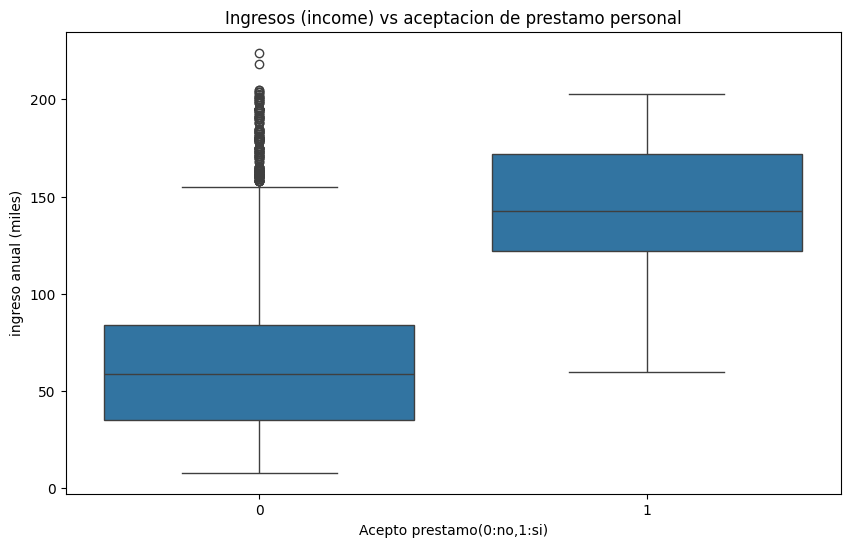

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot (x= 'Personal Loan', y= 'Income', data=df_encode)
plt.title('Ingresos (income) vs aceptacion de prestamo personal')
plt.xlabel('Acepto prestamo(0:no,1:si)')
plt.ylabel('ingreso anual (miles)')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

In [23]:
columnas_a_excluir = ['ID', 'ZIP Code']
x= df_encode.drop(['Personal Loan']+ columnas_a_excluir, axis=1)
y= df_encode['Personal Loan']

In [25]:
X_train, X_test,Y_train,Y_test = train_test_split(x, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:" , X_test.shape)

Forma de X_train: (4000, 14)
Forma de X_test: (1000, 14)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data (from previous cells)
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR1s3VGu9NHlM186qspHvWuJ-El1Ci4XPv-uh3Hfky0iFTGv4xIWnL3euCprl0TK2ZLAmWDQsx_r_xu/pub?gid=1820424605&single=true&output=csv'
df = pd.read_csv(url)

# Create and modify df_encode (from previous cells)
df_encode = pd.get_dummies(df, columns=['Family', 'Education'], drop_first=True)
binarias = ['Securities Account', 'CD Account','Online','CreditCard']
for col in binarias:
  df_encode[col] = df_encode[col].astype('category').cat.codes


# Define features (x) and target (y)
columnas_a_excluir = ['ID', 'ZIP Code']
x = df_encode.drop(['Personal Loan'] + columnas_a_excluir, axis=1)
y = df_encode['Personal Loan']

# Split the data into training and testing sets
X_train, X_test,Y_train,Y_test = train_test_split(x, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [8]:
y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n---matriz de confusion---")
print(confusion_matrix(Y_test, y_pred))

print("\n---reporte de clasificacion(metricas clave)---")
print(classification_report(Y_test, y_pred))


---matriz de confusion---
[[820  84]
 [  7  89]]

---reporte de clasificacion(metricas clave)---
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       904
           1       0.51      0.93      0.66        96

    accuracy                           0.91      1000
   macro avg       0.75      0.92      0.80      1000
weighted avg       0.95      0.91      0.92      1000



In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data (from previous cells)
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR1s3VGu9NHlM186qspHvWuJ-El1Ci4XPv-uh3Hfky0iFTGv4xIWnL3euCprl0TK2ZLAmWDQsx_r_xu/pub?gid=1820424605&single=true&output=csv'
df = pd.read_csv(url)

# Create and modify df_encode (from previous cells)
df_encode = pd.get_dummies(df, columns=['Family', 'Education'], drop_first=True)
binarias = ['Securities Account', 'CD Account','Online','CreditCard']
for col in binarias:
  df_encode[col] = df_encode[col].astype('category').cat.codes

# Define features (x) and target (y)
columnas_a_excluir = ['ID', 'ZIP Code']
x = df_encode.drop(['Personal Loan'] + columnas_a_excluir, axis=1)
y = df_encode['Personal Loan']

# Split the data into training and testing sets
X_train, X_test,Y_train,Y_test = train_test_split(x, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

# Train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, Y_train)

coeficientes = pd.DataFrame({
    'Caracteristica':x.columns,
    'importancia':model.coef_[0]})

In [9]:
coeficientes['importancia_abs']= abs (coeficientes['importancia'])
coeficientes_ordenados = coeficientes.sort_values(by = 'importancia_abs', ascending=False).head(10)
print("\n---Top 10 factores de riesgo/aceptacion---")
print(coeficientes_ordenados[['Caracteristica','importancia']])


---Top 10 factores de riesgo/aceptacion---
        Caracteristica  importancia
6           CD Account     3.670269
13         Education_3     2.855127
12         Education_2     2.696269
11            Family_4     1.210605
10            Family_3     1.168654
5   Securities Account    -0.902959
8           CreditCard    -0.861408
7               Online    -0.775774
3                CCAvg     0.239652
0                  Age    -0.226261
